# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Цель работы:** защитить персональные данные клиентов страховой компании, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**Ход работы:**
1. Загрузка и изучение данных.
2. Ответ и обоснование: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?
3. Алгоритм преобразования.
4. Проверка алгоритма.

## Загрузка данных

Импортируем необходимые в работе библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Загрузим и изучим предоставленные данные.

In [2]:
#чтение файла, вывод первых 5 строк
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
#получение информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В таблице 4 признака и 1 целевой признак. 

**Признаки:**
* `Пол` (тип данных `int`);
* `Возраст` (тип данных `float`);
* `Зарплата` (тип данных `float`);
* `Члены семьи` (тип данных `int`).

**Целевой признак:**
* `Страховые выплаты` (тип данных `int`).

Все типы данных указаны верно, пропусков в таблице нет. Рассмотрим описательные характеристики данных.

In [4]:
#описательные характеристики
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Построим тепловую карту коэффициентов корреляции Пирсона и посмотрим, не коррелируют ли признаки между собой.

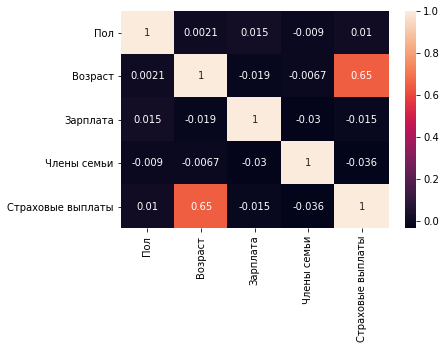

In [5]:
#тепловая карта коэффициентов корреляции Пирсона
sns.heatmap(data.corr(), annot=True);

Признаки `Возраст` и `Страховые выплаты` довольно сильно связаны между собой. 

## Умножение матриц

**Задача:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится

**Обоснование:** 

Чтобы размерности предсказаний, признаков и весов не пострадали, матрица $P$, на которую умножаются признаки, должна быть квадратной, иными словами, если матрица признаков $X$ имеет размерность mxn, то матрица $P$ должна иметь размерность nxn.

Обратимся к формуле обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Умножим матрицу признаков на матрицу $P$, получим новый вектор весов $w_{1}$:

$$
w_{1} = ((X P)^T X P)^{-1} (X P)^T y
$$

Используем свойство транспонирования матриц:

$$
(A B)^T = B^T A^T
$$

$$
w_{1} = (P^T X^T X P)^{-1} P^T X^T y
$$

Воспользуемся свойством ассоциативности умножения, расставим скобки:

$$
w_{1} = (P^T ((X^T X) P))^{-1} P^T X^T y
$$

$P^T$, $X^T X$, $P$ - квадратные матрицы, потому можно применить следующее свойство:

$$
(A B)^{-1} = B^{-1} A^{-1}
$$

$$
w_{1} = ((X^T X) P)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w_{1} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$(P^T)^{-1} P^T$ - это единичная матрица

$$
w_{1} = P^{-1} (X^T X)^{-1} X^T y
$$

$$
w_{1} = P^{-1} w
$$

Получим новые предсказания $a_{1}$:

$$
a_{1} = X P w_{1}
$$

$$
a_{1} = X P P^{-1} w
$$

$P P^{-1}$ - единичная матрица

$$
a_{1} = X w = a
$$

Значения предсказаний не изменились, следовательно, качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

Защитим данные пользователей при помощи умножения признаков $X$ на обратимую матрицу $P$. Обучим и протестируем модель линейной регрессии на обычных признаках $X$ и зашифрованных $X P$,  сравним предсказания и метрики R2.

**Обоснование**

Если доказательство шагом ранее верно, то предсказания на обычных признаках и зашифрованных не будут отличаться.

## Проверка алгоритма

Разделим выборку на признаки и целевой признак.

In [6]:
#деление на признаки и целевой признак
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

Разделим выборку на обучающую и тестовую.

In [7]:
#деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
#проверка размеров
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


Найдем подходящую обратимую матрицу для шифрования признаков.

In [8]:
while True:
    P = np.random.rand(X.shape[1], X.shape[1])
    try:
        np.linalg.inv(P)
        break
    except:
        continue

Зашифруем признаки.

In [9]:
#шифруем признаки
X_encoded = X @ P
#деление на обучающую и тестовую выборки
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12345)
#проверка размеров
print(X_train_enc.shape, X_test_enc.shape, y_train.shape, y_test.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


Обучим модель линейной регрессии до и после шифрования данных и проверим ее при помощи метрики R2.

In [10]:
model = LinearRegression()
#обучаем модель на признаках до шифрования
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('R2-score для незашифрованной выборки:', round(r2_score(y_test, predictions), 4))

#обучаем модель на признаках после шифрования
model.fit(X_train_enc, y_train)
predictions_enc = model.predict(X_test_enc)
print('R2-score для зашифрованной выборки:', round(r2_score(y_test, predictions_enc), 4))

R2-score для незашифрованной выборки: 0.4352
R2-score для зашифрованной выборки: 0.4352


Метрики R2 равны, следовательно, качество предсказания линейной регрессии после шифрования данных не изменилось.

## Вывод

В ходе данной работы были загружены и изучены данные клиентов страховой компании, был предложен алгоритм защиты персональных данных клиентов. Алгоритм был проверен на модели линейной регрессии, качество предсказаний после шифрования не изменилось.